#### TCP 和 UDP 協議的端口號範圍是從 **0 到 65535**，但這些端口可分為三個主要範疇：

1. **系統保留端口（0 到 1023）：**
   - 這些端口通常被保留給系統服務和知名協議（如 HTTP 使用 80 端口，HTTPS 使用 443 端口，SSH 使用 22 端口）。
   - 這些端口號一般不應該用於應用程序，因為它們通常需要高級權限來分配。

2. **用戶端口（1024 到 49151）：**
   - 這些端口號可以被應用程序自由使用。
   - 一般來說，大多數應用程序會使用這些範圍內的端口來避免與系統服務發生衝突。

3. **動態端口（49152 到 65535）：**
   - 這些端口號通常被用作臨時端口，稱為 **動態端口** 或 **私有端口**，由操作系統自動分配給用戶進行短期通信，如網絡連接。
   - 它們不適合作為長期服務器端口使用，但對於短期連接是安全的。

所以，如果你為你的 Docker 容器或其他應用程序選擇一個端口，最好選擇 **1024 到 49151** 之間的範圍，以避免與系統保留端口或動態端口發生衝突。

4. **運行新的容器，指定新的端口**:
   假設你想改成 `8080`，命令如下：
   ```bash
   docker run -d --name fastapi-yolo -p 8080:8000 fastapi-yolo-app
   ```

   這表示把主機的 `8080` 端口映射到容器內的 `8000` 端口。

總之，你不需要重建映像或修改應用程式，只需使用不同的端口重新運行容器即可。

- **主機端口** 是指你電腦（Docker 主機）的端口號。
- **容器端口** 是指你在 Docker 容器內的應用程式監聽的端口號。

在 `main.py` 中，FastAPI 會默認在容器內的 `8000` 端口上運行，但這個端口只對容器內部可見。如果你想從主機（你的電腦）訪問這個應用程式，你需要將主機端口映射到容器端口。

例如，當你運行以下命令：
```bash
docker run -d --name fastapi-yolo -p 8080:8000 fastapi-yolo-app
```

- **主機的 `8080` 端口** 被映射到了 **容器的 `8000` 端口**。
- 容器內部的 FastAPI 仍然運行在 `8000` 端口上（`main.py` 中指定的默認端口）。
- 你可以通過 `http://localhost:8080` 訪問主機上的 FastAPI 應用，因為主機的 `8080` 端口被映射到了容器的 `8000` 端口。

如果你想更改 FastAPI 內部監聽的端口（例如改為 `9000`），你需要在 `main.py` 中指定這個端口：
```python
if __name__ == "__main__":
    import uvicorn
    uvicorn.run(app, host="0.0.0.0", port=9000)
```

然後運行 Docker 容器時映射對應的端口：
```bash
docker run -d --name fastapi-yolo -p 8080:9000 fastapi-yolo-app
```

這表示主機的 `8080` 端口映射到容器的 `9000` 端口。

---

### 建立容器：

1. 構建 Docker 映像。

   運行以下命令以構建映像：

   ```bash
   docker-compose build
   ```

2. 運行容器：

   ```bash
   docker-compose up -d
   ```
---

當你執行 `docker-compose build` 時，如果 Dockerfile 存在於該目錄下，`docker-compose` 會自動根據你提供的 `build: .` 指令構建一個新的 Docker 映像。如果成功構建，映像名稱會根據 `image: fastapi-yolo-app` 被命名為 `fastapi-yolo-app`。

### 操作步驟：

1. **確保 Dockerfile 在目錄中：**  
   在執行 `docker-compose build` 之前，確保 Dockerfile 位於 `docker-compose.yml` 文件中指定的目錄下（也就是 `build: .` 對應的目錄）。該 Dockerfile 將會用來構建映像。

2. **構建映像：**  
   執行以下命令來構建映像：
   ```bash
   docker-compose build
   ```

3. **啟動容器：**  
   构建完成後，你可以通过以下命令启动容器：
   ```bash
   docker-compose up -d
   ```

### 關於 Image 名稱：

在 `docker-compose.yml` 文件中，你指定了 `image: fastapi-yolo-app`，這意味著：

- 如果你沒有提前手動構建過名為 `fastapi-yolo-app` 的映像，執行 `docker-compose build` 時，系統會自動根據你的 Dockerfile 構建這個映像。
- 如果你修改了 Dockerfile 或映像配置，重新執行 `docker-compose build` 會更新這個映像。

### 關於 `volumes`：
你在 `volumes` 中指定了多個目錄掛載：
```yaml
volumes:
  - "D:/Learning_Python/30-Day_AI_Deep_Learning_Plan/第4週：模型部署/Day22:/app"
  - "D:/Learning_Python/30-Day_AI_Deep_Learning_Plan/第4週：模型部署/Day19:/app"
  - "D:/Learning_Python/30-Day_AI_Deep_Learning_Plan/yolov5-master/runs/train/exp2:/app/exp2"
```
這裡有一個問題：你不能將多個本地目錄掛載到同一個容器內路徑 (`/app`)，因為這會導致後一個目錄覆蓋前一個。因此你應該確保每個本地目錄掛載到容器中的不同路徑。例如：
```yaml
volumes:
  - "D:/Learning_Python/30-Day_AI_Deep_Learning_Plan/第4週：模型部署/Day22:/app/Day22"
  - "D:/Learning_Python/30-Day_AI_Deep_Learning_Plan/第4週：模型部署/Day19:/app/Day19"
  - "D:/Learning_Python/30-Day_AI_Deep_Learning_Plan/yolov5-master/runs/train/exp2:/app/exp2"
```

### 結論：
- `docker-compose build` 會自動構建映像。
- 映像名稱會是 `fastapi-yolo-app`。
- 請確保不同的 `volumes` 對應到容器中的不同路徑。

---

### 驗證執行結果 - 步驟一

- 在 Docker 中成功啟動了 FastAPI 應用

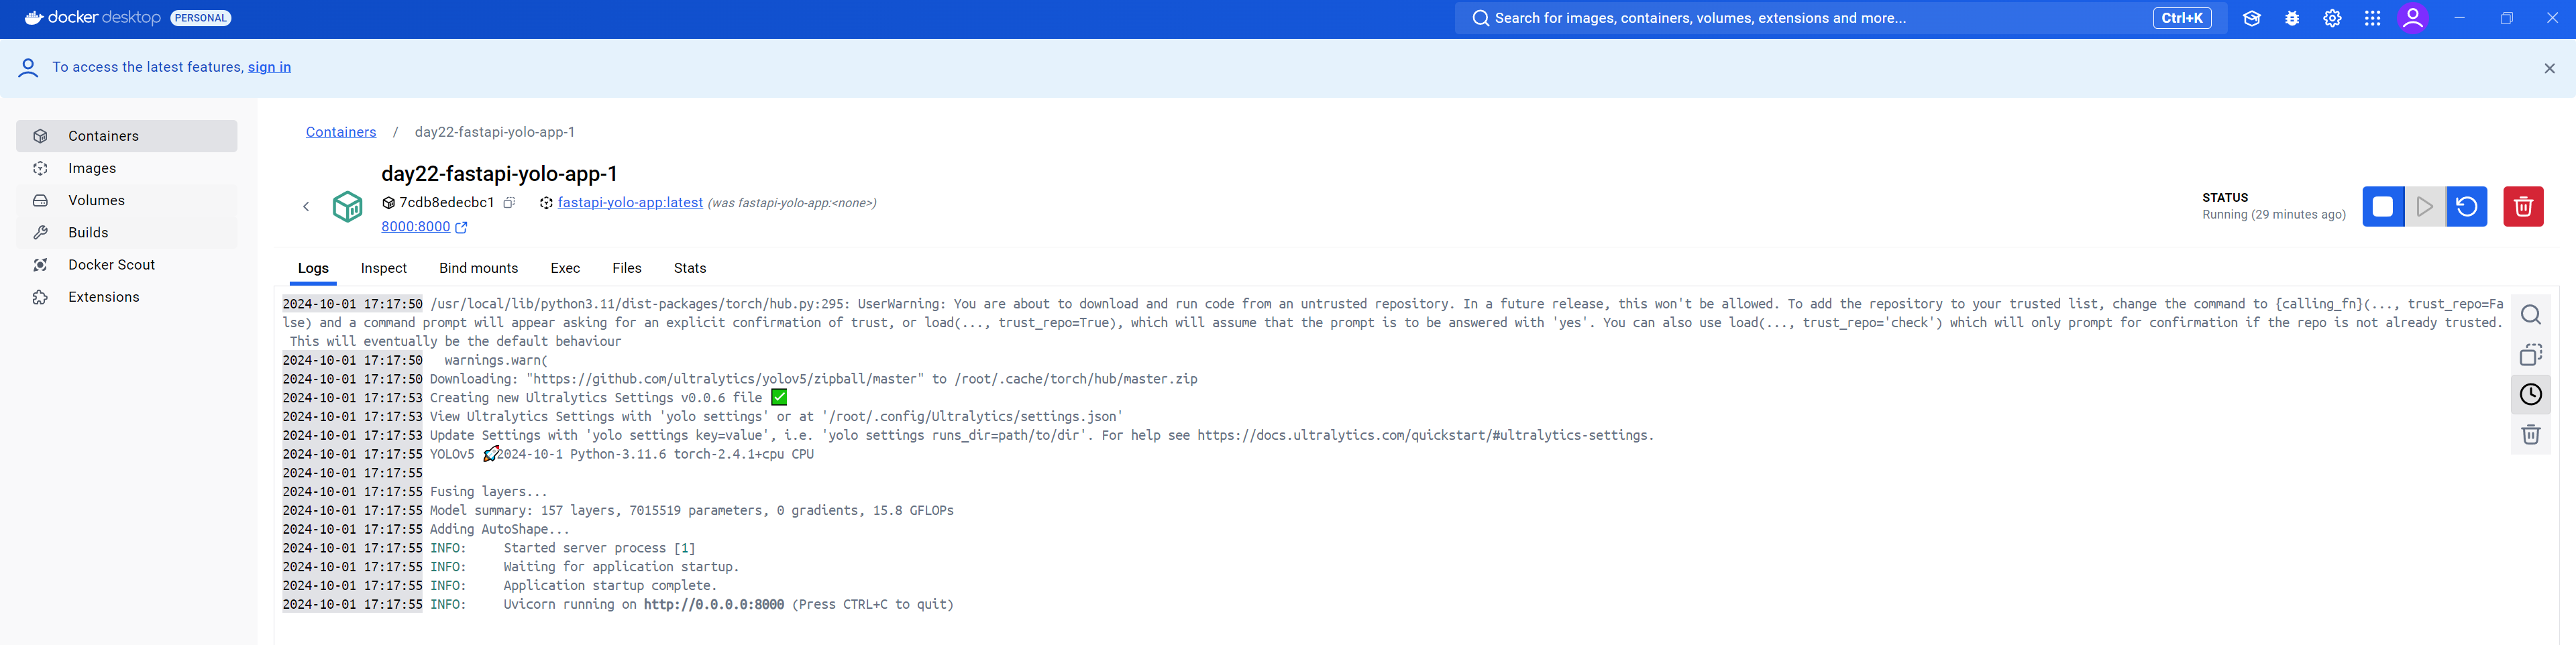

---

### 驗證執行結果 - 步驟二

要驗證「定義一個端點來接受圖片並進行推理」的 FastAPI 應用，你可以按以下步驟進行：

##### 步驟 1：啟動應用
你已經在 Docker 中成功啟動了 FastAPI 應用，可以確認應用正在運行。該應用會在 `http://0.0.0.0:8000` 監聽。

##### 步驟 2：使用 Swagger UI 測試端點
FastAPI 自帶了 Swagger UI，可讓你測試 API 端點。你可以通過訪問 `http://localhost:8000/docs` 進入 Swagger UI。

1. 打開瀏覽器並輸入 `http://localhost:8000/docs`。
2. 在 Swagger UI 中，應該可以看到 `/predict/` 這個端點。
3. 點擊 `/predict/`，選擇“Try it out”，然後上傳一張圖片進行測試。
4. 點擊“Execute”來執行推理。

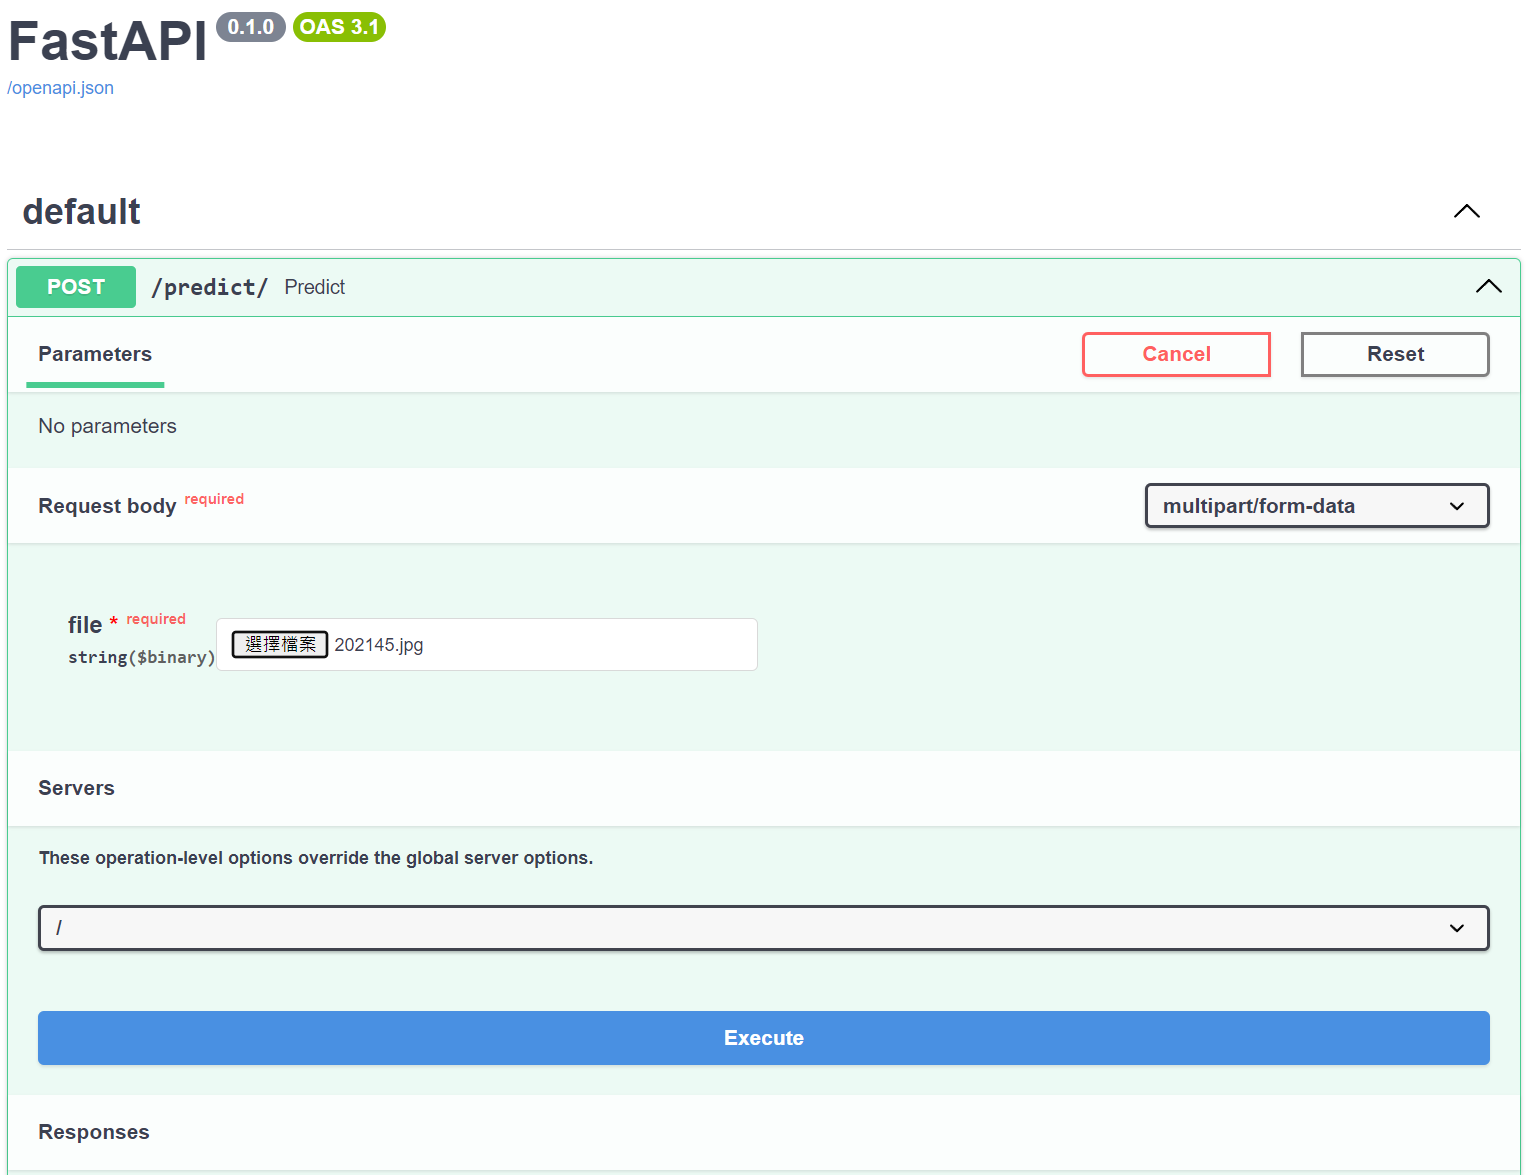

### 步驟 3：使用 cURL 或 Postman 測試

#### cURL 測試
你可以使用 cURL 測試該端點。假設你有一張名為 `test.jpg` 的圖片，並且放在當前目錄中，執行以下命令：

```bash
curl -X 'POST' \
  'http://localhost:8000/predict/' \
  -H 'accept: application/json' \
  -H 'Content-Type: multipart/form-data' \
  -F 'file=@test.jpg'
```

這會將圖片 `test.jpg` 上傳到 `/predict/` 端點，並返回 YOLO 模型的物件檢測結果。

#### Postman 測試
1. 打開 Postman，選擇“POST”請求。
2. 輸入 `http://localhost:8000/predict/` 作為 URL。
3. 在“Body”選項卡中選擇“form-data”，並選擇 `file` 作為鍵，然後選擇你要測試的圖片作為文件上傳。
4. 點擊“Send”，結果將會顯示在 Postman 的響應區域中。

##### 步驟 4：驗證推理結果
推理結果將會返回一個 JSON 格式的結果，包含物件的座標、類別、置信度等。你可以在 `results.pandas().xyxy[0].to_dict(orient="records")` 這一行返回的物件檢測結果中看到：

- `xmin`, `ymin`, `xmax`, `ymax`: 這些是邊界框的座標。
- `confidence`: 檢測物件的置信度。
- `class`: 檢測到的類別名稱。

這樣你就可以測試並驗證你的 FastAPI 應用是否能夠成功地進行圖片推理。

---

要驗證「定義一個端點來接受圖片並進行推理」的 FastAPI 應用，可以按以下步驟進行：

### 步驟 1：啟動應用
你已經在 Docker 中成功啟動了 FastAPI 應用，可以確認應用正在運行。該應用會在 `http://0.0.0.0:8000` 監聽。

### 步驟 2：使用 Swagger UI 測試端點
FastAPI 自帶了 Swagger UI，可讓你測試 API 端點。你可以通過訪問 `http://localhost:8000/docs` 進入 Swagger UI。

1. 打開瀏覽器並輸入 `http://localhost:8000/docs`。
2. 在 Swagger UI 中，應該可以看到 `/predict/` 這個端點。
3. 點擊 `/predict/`，選擇“Try it out”，然後上傳一張圖片進行測試。
4. 點擊“Execute”來執行推理。

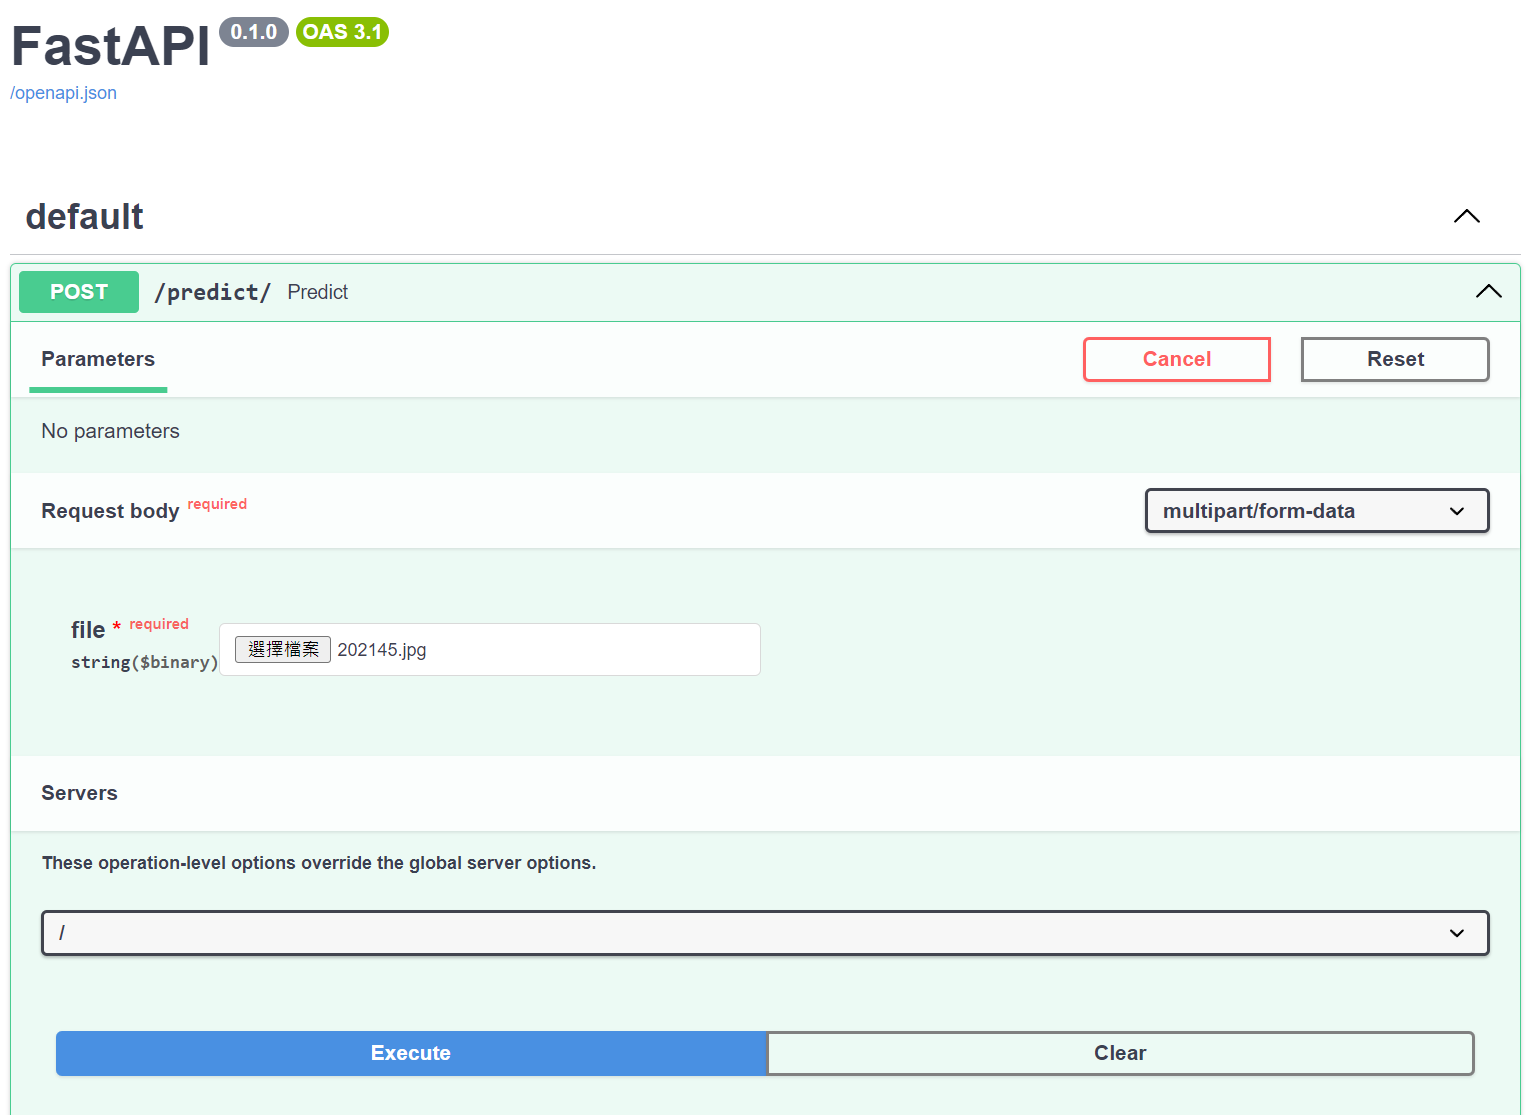

#### Postman 測試
1. 打開 Postman，選擇“POST”請求。
2. 輸入 `http://localhost:8000/predict/` 作為 URL。
3. 在“Body”選項卡中選擇“form-data”，並選擇 `file` 作為鍵，然後選擇你要測試的圖片作為文件上傳。
4. 點擊“Send”，結果將會顯示在 Postman 的響應區域中。

### 步驟 4：驗證推理結果
推理結果將會返回一個 JSON 格式的結果，包含物件的座標、類別、置信度等。你可以在 `results.pandas().xyxy[0].to_dict(orient="records")` 這一行返回的物件檢測結果中看到：

- `xmin`, `ymin`, `xmax`, `ymax`: 這些是邊界框的座標。
- `confidence`: 檢測物件的置信度。
- `class`: 檢測到的類別名稱。

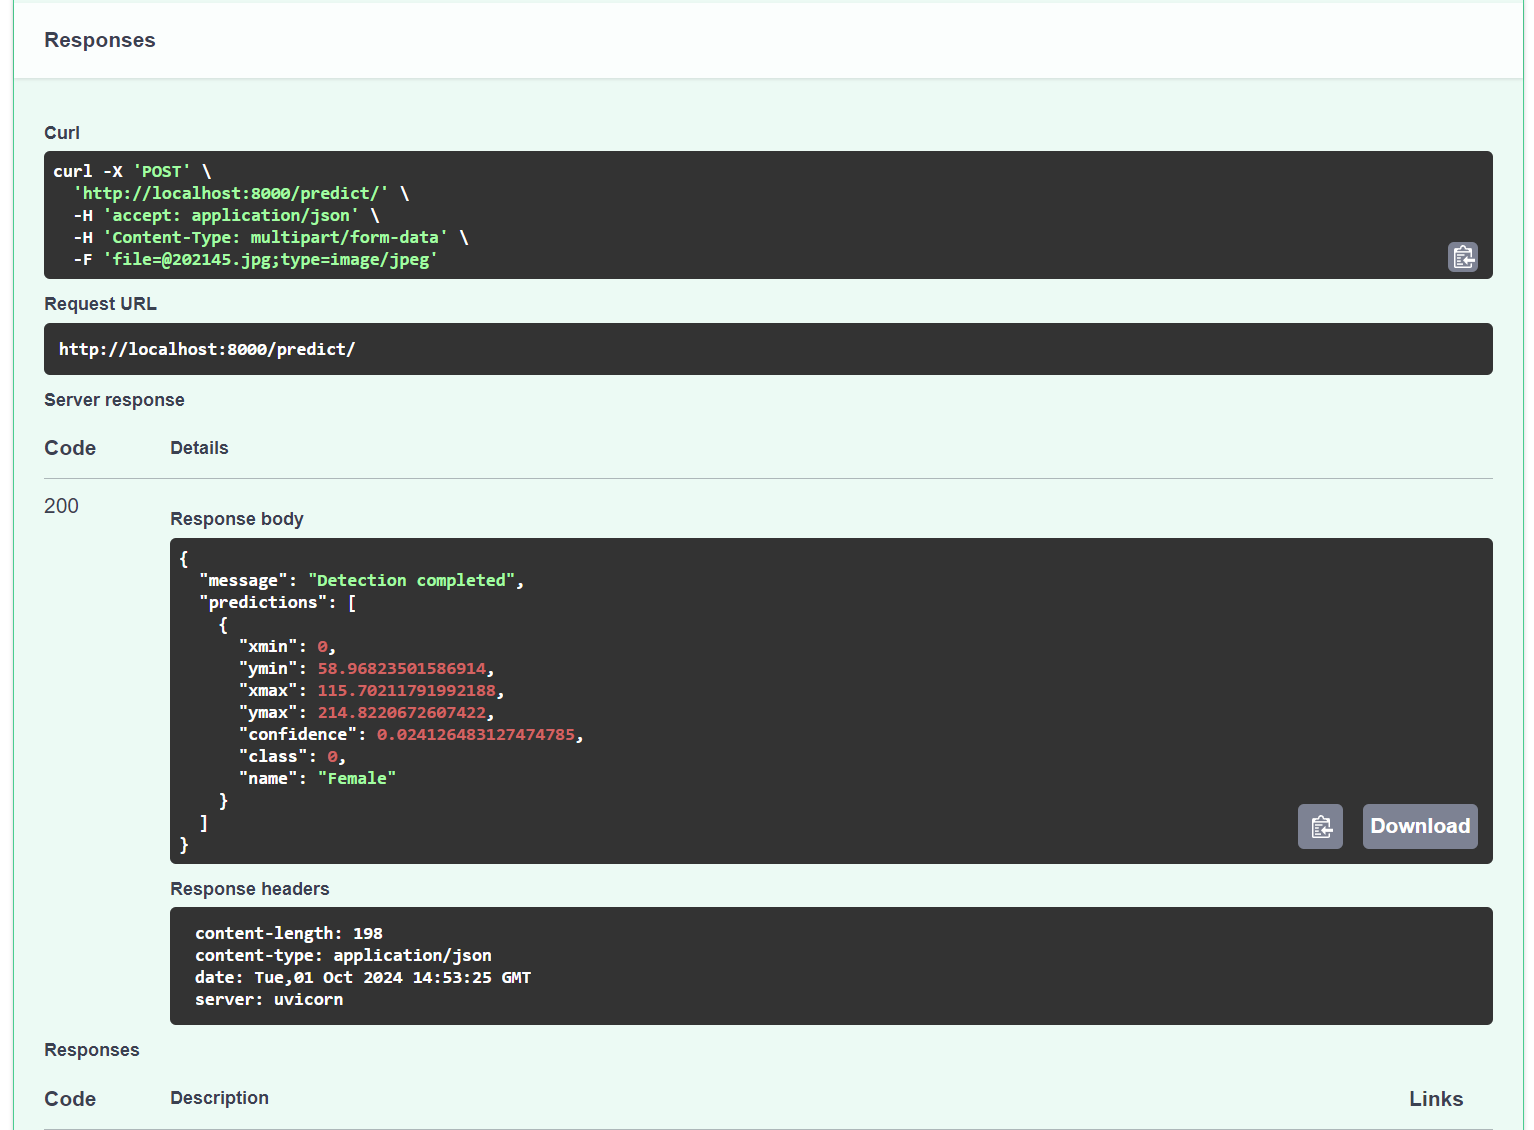

這樣你就可以測試並驗證你的 FastAPI 應用是否能夠成功地進行圖片推理。

---